In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.stats import rv_continuous
from scipy.special import gamma
import numpy as np
import emcee
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad
from scipy.integrate import quad
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import lmfit
from py_unsio import *
import pymc
import os
from pymodelfit import FunctionModel1DAuto
import wkbl
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
import iminuit
from iminuit import Minuit, describe, Struct
import probfit
import warnings
from matplotlib.colors import LogNorm
warnings.filterwarnings('ignore')

In [5]:
path = "/data/OWN/DMO/mochima2/output_00041"
Z4 = wkbl.Galaxy_Hound(path)
Z4.r_virial(600)
Z4.r200

loading Dark matter..


229.1015625

In [6]:
path = "/data/OWN/DMO/mochima2_Z5/output_00041"
Z5 = wkbl.Galaxy_Hound(path)
Z5.r_virial(600)
Z5.r200

loading Dark matter..


227.9296875

In [15]:
print np.unique(Z4.dm.mass,return_counts=True)
print np.unique(Z5.dm.mass,return_counts=True)

(array([1.8138952e+06, 1.4511162e+07, 1.1608930e+08], dtype=float32), array([926987,   1121,      7]))
(array([2.2673691e+05, 1.8138952e+06, 1.4511162e+07, 1.1608930e+08],
      dtype=float32), array([7314737,   20356,     231,       3]))


<IPython.core.display.Javascript object>


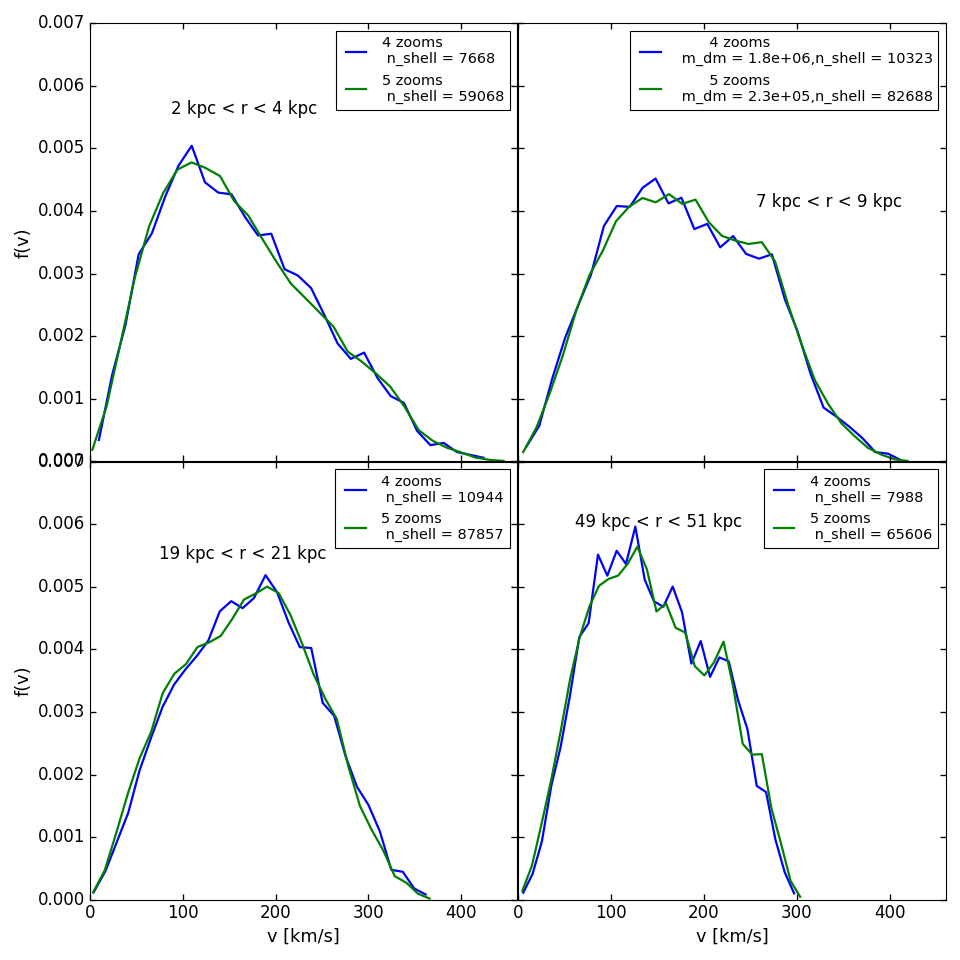

In [90]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2,2,figsize=[12,12])

rmin, rmax = 2,4
binnum = 30
fvZ4,binsZ4 = np.histogram(Z4.dm.v[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)],bins=binnum,normed=1)
fvZ5,binsZ5 = np.histogram(Z5.dm.v[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)],bins=binnum,normed=1)
ax1.set_ylim([0,0.007])
ax1.set_xlim([0,460])

#ax1.set_xlabel('v [km/s]',fontsize=16)
ax1.set_ylabel('f(v)',fontsize=16)
ax1.text(0.2*binsZ4.max(),1.1*fvZ4.max(),"{0} kpc < r < {1} kpc".format(rmin,rmax),fontsize=15)
n_z4 = len(Z4.dm.mass[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)])
m_z4 = Z4.dm.mass.min()
n_z5 = len(Z5.dm.mass[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)])
m_z5 = Z5.dm.mass.min()

ax1.plot(binsZ4[:-1],fvZ4,lw=2,label="4 zooms\n n_shell = {1}".format(m_z4,n_z4))
ax1.plot(binsZ5[:-1],fvZ5,lw=2,label="5 zooms\n n_shell = {1}".format(m_z5,n_z5))
legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
frame = legend.get_frame()

rmin, rmax = 7,9
fvZ4,binsZ4 = np.histogram(Z4.dm.v[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)],bins=binnum,normed=1)
fvZ5,binsZ5 = np.histogram(Z5.dm.v[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)],bins=binnum,normed=1)
ax2.set_ylim([0,0.007])
ax2.set_xlim([0,460])
#ax1.set_xlabel('v [km/s]',fontsize=16)
#ax2.set_ylabel('f(v)',fontsize=16)
ax2.text(0.6*binsZ4.max(),0.9*fvZ4.max(),"{0} kpc < r < {1} kpc".format(rmin,rmax),fontsize=15)
n_z4 = len(Z4.dm.mass[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)])
m_z4 = Z4.dm.mass.min()
n_z5 = len(Z5.dm.mass[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)])
m_z5 = Z5.dm.mass.min()
ax2.plot(binsZ4[:-1],fvZ4,lw=2,label="       4 zooms\n m_dm = {0:.1e},n_shell = {1}".format(m_z4,n_z4))
ax2.plot(binsZ5[:-1],fvZ5,lw=2,label="       5 zooms\n m_dm = {0:.1e},n_shell = {1}".format(m_z5,n_z5))
legend = ax2.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
frame = legend.get_frame()


rmin, rmax = 19,21
fvZ4,binsZ4 = np.histogram(Z4.dm.v[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)],bins=binnum,normed=1)
fvZ5,binsZ5 = np.histogram(Z5.dm.v[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)],bins=binnum,normed=1)
ax3.set_ylim([0,0.007])
ax3.set_xlim([0,460])
ax3.set_xlabel('v [km/s]',fontsize=16)
ax3.set_ylabel('f(v)',fontsize=16)
ax3.text(0.2*binsZ4.max(),1.05*fvZ4.max(),"{0} kpc < r < {1} kpc".format(rmin,rmax),fontsize=15)
n_z4 = len(Z4.dm.mass[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)])
m_z4 = Z4.dm.mass.min()
n_z5 = len(Z5.dm.mass[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)])
m_z5 = Z5.dm.mass.min()
ax3.plot(binsZ4[:-1],fvZ4,lw=2,label="4 zooms\n n_shell = {1}".format(m_z4,n_z4))
ax3.plot(binsZ5[:-1],fvZ5,lw=2,label="5 zooms\n n_shell = {1}".format(m_z5,n_z5))
legend = ax3.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
frame = legend.get_frame()

rmin, rmax = 49,51
fvZ4,binsZ4 = np.histogram(Z4.dm.v[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)],bins=binnum,normed=1)
fvZ5,binsZ5 = np.histogram(Z5.dm.v[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)],bins=binnum,normed=1)
ax4.set_ylim([0,0.007])
ax4.set_xlim([0,460])
ax4.set_xlabel('v [km/s]',fontsize=16)
#ax4.set_ylabel('f(v)',fontsize=16)
ax4.text(0.2*binsZ4.max(),1.*fvZ4.max(),"{0} kpc < r < {1} kpc".format(rmin,rmax),fontsize=15)
n_z4 = len(Z4.dm.mass[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)])
m_z4 = Z4.dm.mass.min()
n_z5 = len(Z5.dm.mass[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)])
m_z5 = Z5.dm.mass.min()
ax4.plot(binsZ4[:-1],fvZ4,lw=2,label="4 zooms\n n_shell = {1}".format(m_z4,n_z4))
ax4.plot(binsZ5[:-1],fvZ5,lw=2,label="5 zooms\n n_shell = {1}".format(m_z5,n_z5))
legend = ax4.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
frame = legend.get_frame()

ax1.tick_params(axis='x', which='major', labelsize=0, size=5,width=1.2)
ax1.tick_params(axis='y', which='major', labelsize=15, size=5,width=1.2)
ax1.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax2.tick_params(axis='both', which='major', labelsize=0, size=5,width=1.2)
ax2.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax3.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
ax3.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)
ax4.tick_params(axis='y', which='major', labelsize=0, size=5,width=1.2)
ax4.tick_params(axis='x', which='major', labelsize=15, size=5,width=1.2)
ax4.tick_params(axis='both', which='minor', labelsize=15, size=3,width=1.2)


fig.tight_layout(h_pad=-1.3,w_pad=-.5)
fig.savefig("/home/arturo/Documents/git/LAMtoLUPM_latex/DMresolution.pdf")

<IPython.core.display.Javascript object>


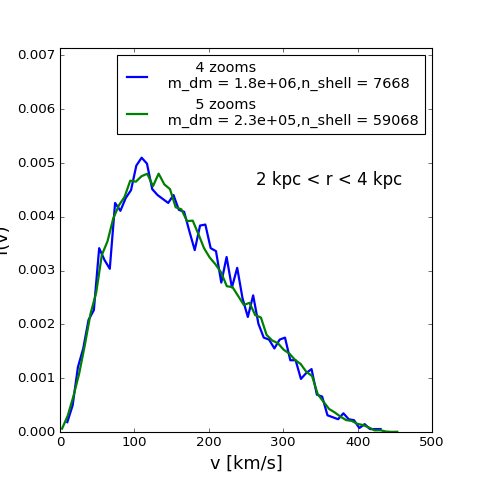

In [44]:
rmin, rmax = 2,4
binnum = 60
fvZ4,binsZ4 = np.histogram(Z4.dm.v[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)],bins=binnum,normed=1)
fvZ5,binsZ5 = np.histogram(Z5.dm.v[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)],bins=binnum,normed=1)

fig, ax = plt.subplots(figsize=[6,6])
ax.set_ylim([0,1.4*fvZ4.max()])
ax.set_xlabel('v [km/s]',fontsize=16)
ax.set_ylabel('f(v)',fontsize=16)
ax.text(0.6*binsZ4.max(),0.9*fvZ4.max(),"{0} kpc < r < {1} kpc".format(rmin,rmax),fontsize=15)
n_z4 = len(Z4.dm.mass[(Z4.dm.r>rmin)&(Z4.dm.r<rmax)])
m_z4 = Z4.dm.mass.min()
n_z5 = len(Z5.dm.mass[(Z5.dm.r>rmin)&(Z5.dm.r<rmax)])
m_z5 = Z5.dm.mass.min()

ax.plot(binsZ4[:-1],fvZ4,lw=2,label="       4 zooms\n m_dm = {0:.1e},n_shell = {1}".format(m_z4,n_z4))
ax.plot(binsZ5[:-1],fvZ5,lw=2,label="       5 zooms\n m_dm = {0:.1e},n_shell = {1}".format(m_z5,n_z5))
legend = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
frame = legend.get_frame()

In [5]:
nucenter = nbe.real_center(myhalo.dm.pos3d, myhalo.dm.mass)
myhalo.center_shift(nucenter)
myhalo.redefine(4.5)

In [6]:
ok,rho_st,_= CF.getDensity(np.array(myhalo.st.pos3d.reshape(len(myhalo.st.pos3d)*3),dtype=np.float32), myhalo.st.mass)

In [7]:
ok,rho_dm,_= CF.getDensity(np.array(myhalo.dm.pos3d.reshape(len(myhalo.dm.pos3d)*3),dtype=np.float32), myhalo.dm.mass)